In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Housing.csv")

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580306e+09,5.400886e+05,3.370795,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876570e+09,3.671268e+05,0.930105,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df.drop('date', axis=1, inplace=True)
df.drop('zipcode', axis = 1, inplace= True)

In [5]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,7229300521,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

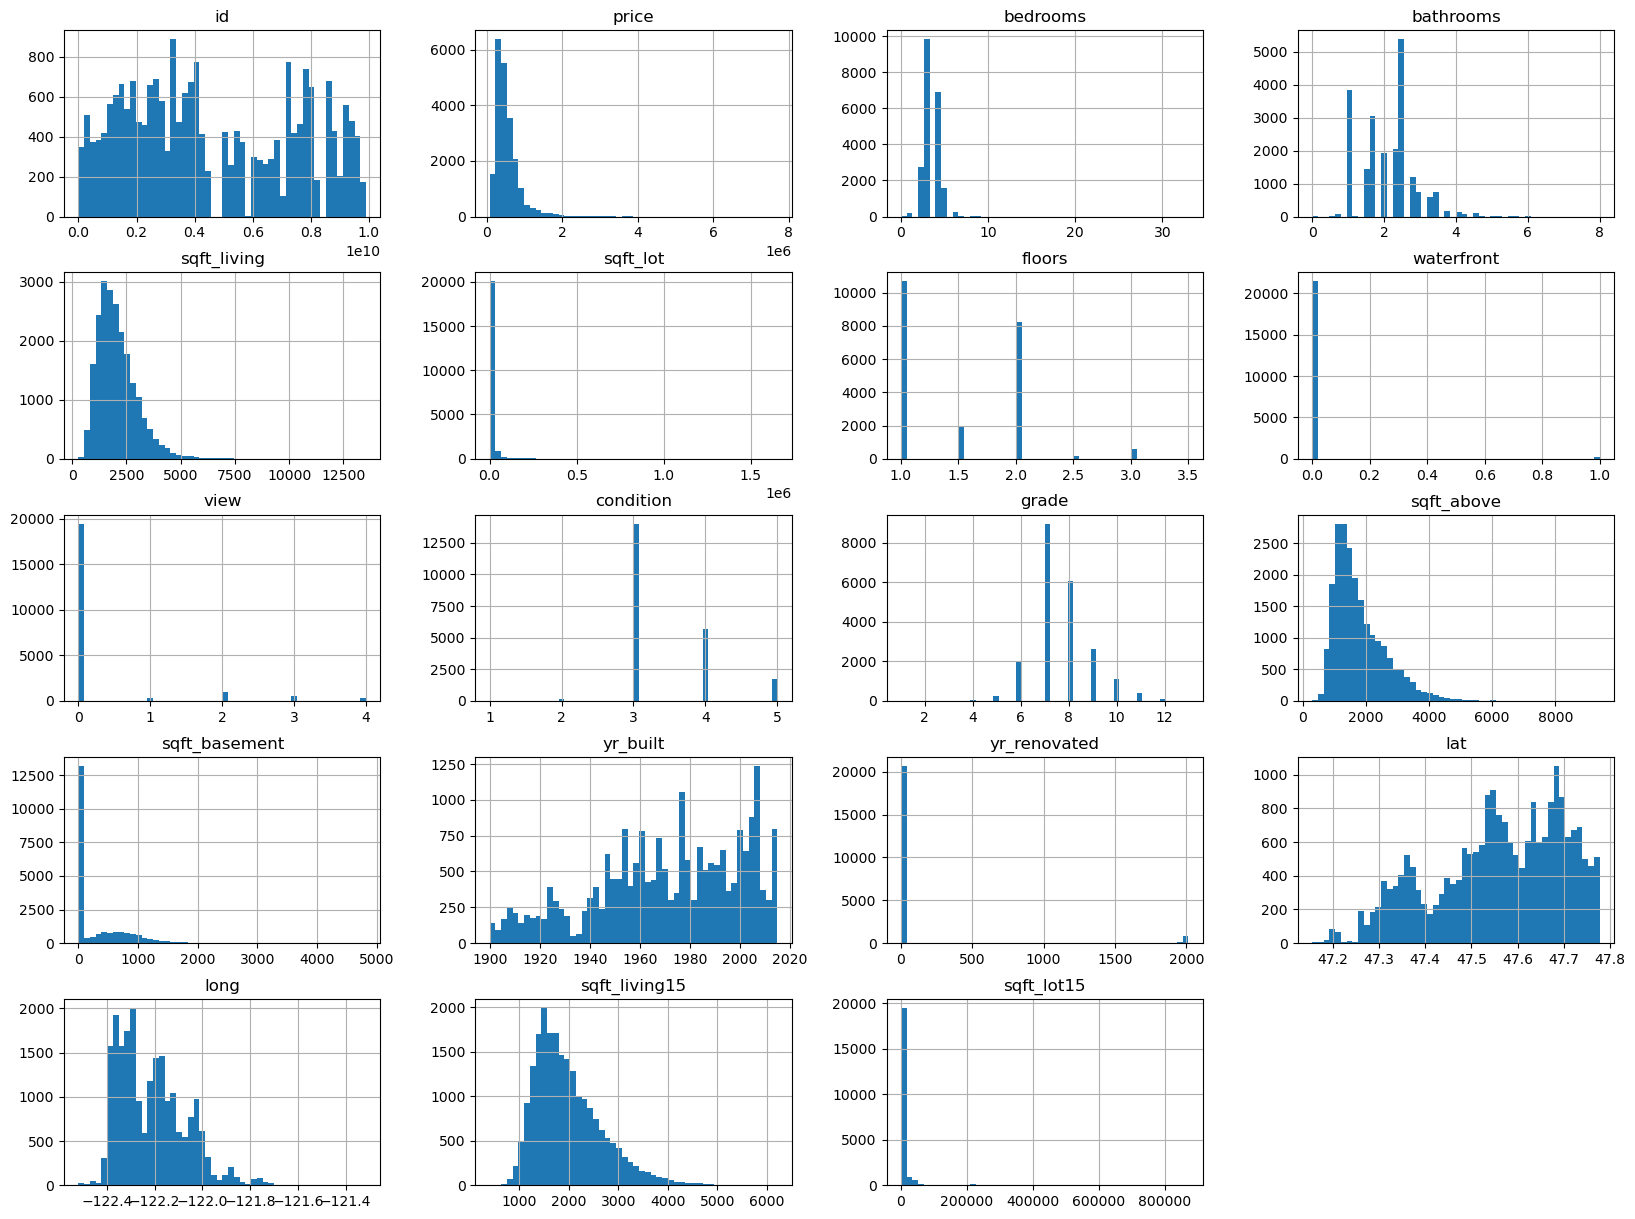

In [7]:
df.hist(bins=50, figsize= (20,15))
plt.show()

In [8]:
# df['coordinates'] = df['lat'].round(6).astype(str) + ', ' + df['long'].round(6).astype(str)

In [9]:
df.drop(['lat', 'long'], axis=1, inplace=True)

## Trying out Attribute Combinations

In [10]:
# df["newattr"] = df[attr1]/df[attr2]

## Looking For Correlations

In [11]:
corr_matrix = df.select_dtypes(include='number').corr()

In [12]:
corr_matrix['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585378
bathrooms        0.525136
view             0.397294
sqft_basement    0.323816
bedrooms         0.308377
waterfront       0.266370
floors           0.256793
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054011
condition        0.036361
id              -0.016762
Name: price, dtype: float64

In [13]:
from pandas.plotting import scatter_matrix

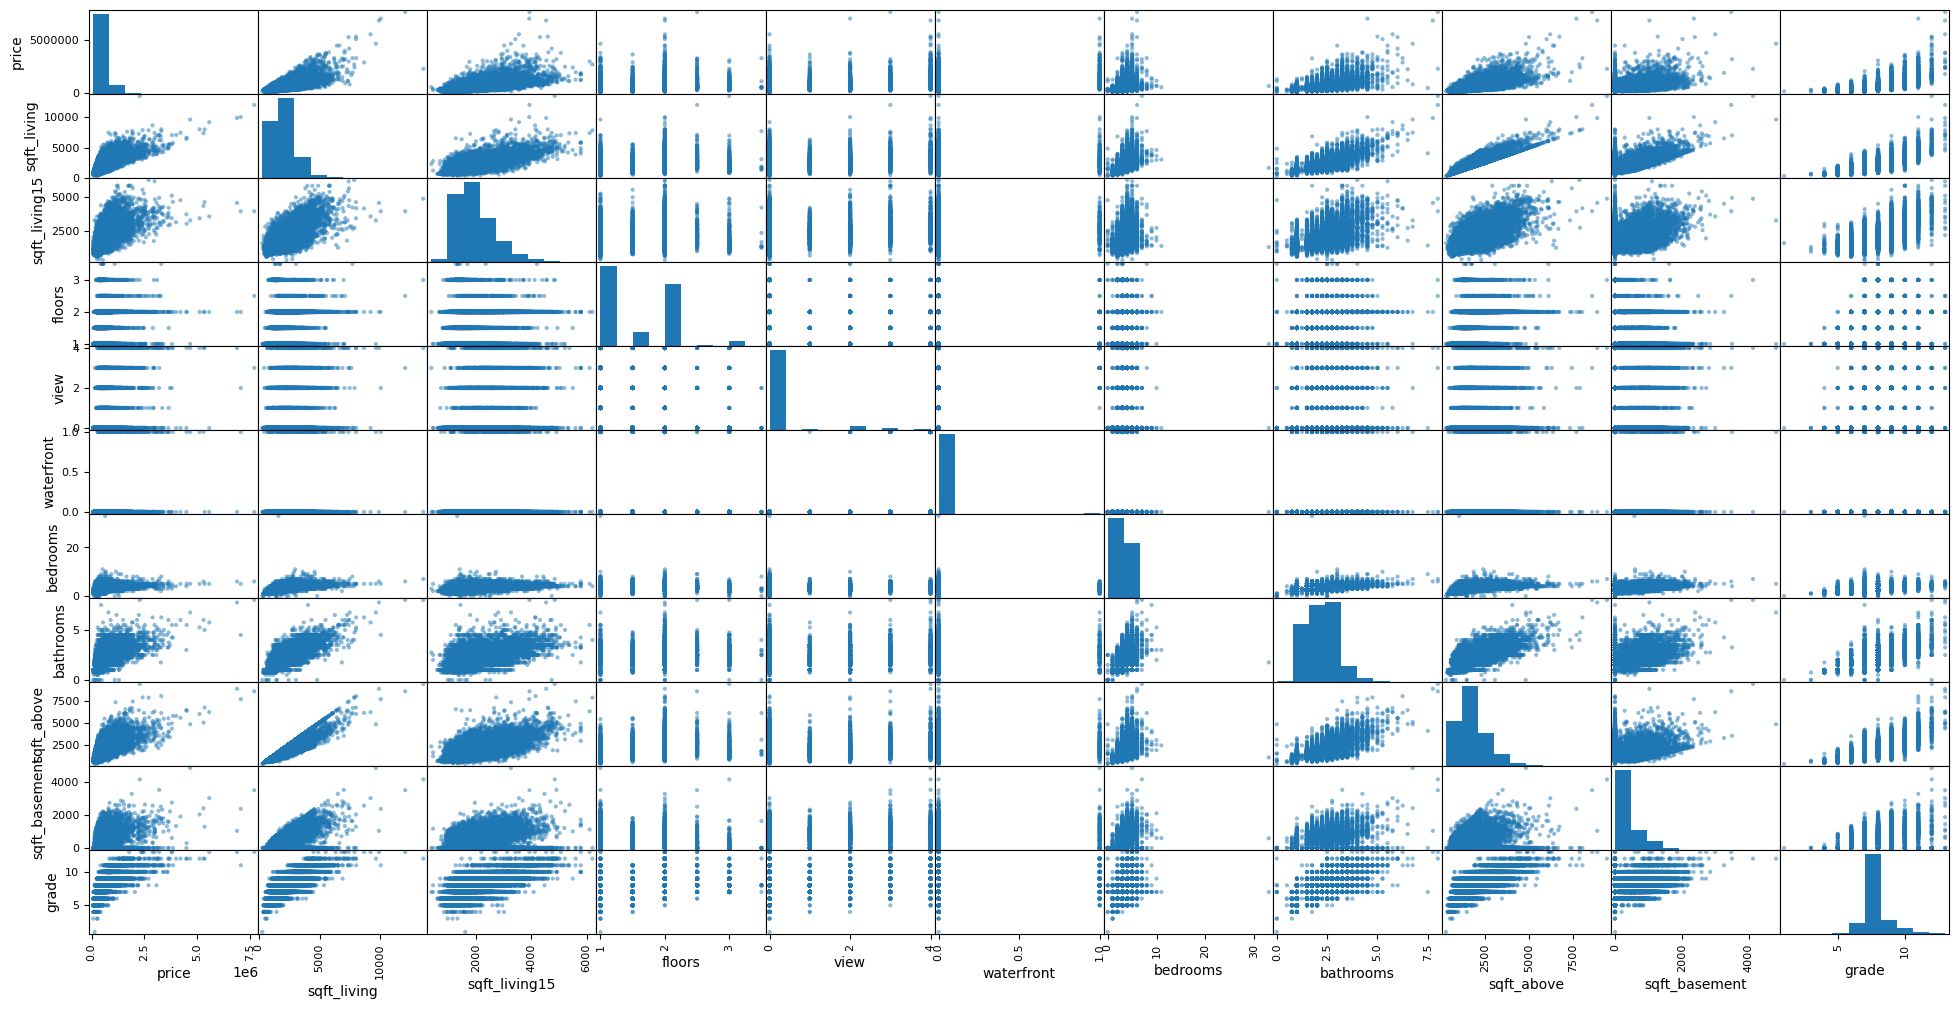

In [14]:
attributes=["price", "sqft_living","sqft_living15","floors", "view","waterfront","bedrooms", "bathrooms", "sqft_above","sqft_basement", "grade"]
scatter_matrix(df[attributes],figsize=(24,12))
plt.show()

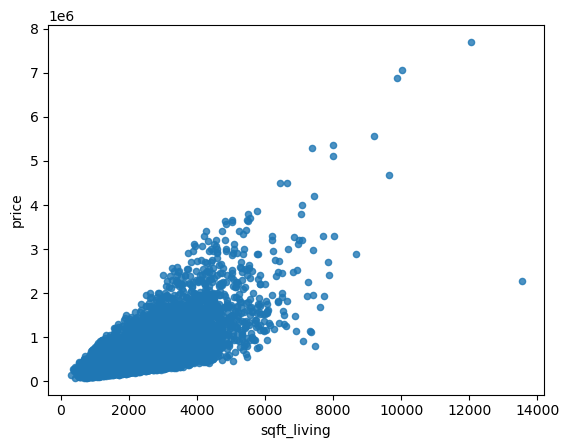

In [15]:
df.plot(kind="scatter", x="sqft_living", y="price", alpha=0.8)
plt.show()

## Train-test split

In [16]:
import numpy as np

In [17]:
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[: test_set_size]
    train_indices =shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [18]:
train_set, test_set= split_train_test(df, 0.2)

In [19]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 17291
Rows in test set: 4322



In [20]:
df['yr_renovated'].value_counts()

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [22]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 17290
Rows in test set: 4323



In [23]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['waterfront'], df['floors']):
    strat_train_set= df.loc[train_index]
    strat_test_set= df.loc[test_index]

D:\jupyternotebook\Lib\site-packages\sklearn\model_selection\_split.py:2330: UserWarning: The groups parameter is ignored by StratifiedShuffleSplit
  warnings.warn(


In [24]:
df = strat_train_set.copy()

In [25]:
strat_test_set['waterfront'].value_counts()

waterfront
0    4290
1      33
Name: count, dtype: int64

In [26]:
strat_train_set['waterfront'].value_counts()

waterfront
0    17160
1      130
Name: count, dtype: int64

In [27]:
df = strat_train_set.drop("price", axis=1)
df_labels= strat_train_set["price"].copy()

### finding missing values

In [28]:
from sklearn.impute import SimpleImputer

In [29]:
numeric_df = df.select_dtypes(include=['number'])
imputer = SimpleImputer(strategy="median")
imputer.fit(numeric_df)

SimpleImputer(strategy='median')

In [30]:
imputer.statistics_

array([3.9049608e+09, 3.0000000e+00, 2.2500000e+00, 1.9100000e+03,
       7.6020000e+03, 1.5000000e+00, 0.0000000e+00, 0.0000000e+00,
       3.0000000e+00, 7.0000000e+00, 1.5600000e+03, 0.0000000e+00,
       1.9750000e+03, 0.0000000e+00, 1.8400000e+03, 7.6200000e+03])

In [31]:
X = imputer.transform(numeric_df)

In [32]:
df_tr = pd.DataFrame(X, columns=numeric_df.columns)

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

In [34]:
df_num_tr = my_pipeline.fit_transform(df_tr)

## Select and Train model

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df_num_tr, df_labels)

LinearRegression()

In [36]:
some_data = df.iloc[:5]

In [37]:
some_labels =df_labels.iloc[:5]

In [38]:
prepared_data = my_pipeline.transform(some_data)

In [39]:
model.predict(prepared_data)

array([ 340311.79968274, 1383876.91148033,  193034.03665407,
        642769.3783216 , 1192410.67575575])

In [40]:
list(some_labels)

[303000.0, 1506000.0, 235000.0, 520000.0, 1267500.0]

In [41]:
from sklearn.metrics import mean_squared_error
df_predictions = model.predict(df_num_tr)
lin_mse = mean_squared_error(df_labels, df_predictions)
lin_rmse = np.sqrt(lin_mse)

In [42]:
#Cross_validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, df_num_tr, df_labels, scoring ="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)   

In [43]:
lin_rmse

215332.2392562149

In [44]:
def print_scores(scores):
    print("scores:", scores)
    print("mean:", scores.mean())
    print("Standard deviation: ", scores.std())

In [46]:
print_scores(lin_rmse)

scores: 215332.2392562149
mean: 215332.2392562149
Standard deviation:  0.0


In [47]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(df_num_tr, df_labels)

DecisionTreeRegressor()

In [48]:
list(some_labels)

[303000.0, 1506000.0, 235000.0, 520000.0, 1267500.0]

In [49]:
some_data = df.iloc[:5]
some_labels =df_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)


array([ 303000., 1506000.,  235000.,  520000., 1267500.])

In [50]:
#Cross_validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, df_num_tr, df_labels, scoring ="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)   

In [51]:
def print_scores(scores):
    print("scores:", scores)
    print("mean:", scores.mean())
    print("Standard deviation: ", scores.std())

In [52]:
print_scores(rmse_scores)

scores: [269899.99113014 253938.13295108 265751.74876452 264164.70674211
 248959.87984992 271968.35694606 213374.35889148 248322.81573317
 283314.76863851 247589.92603457]
mean: 256728.46856815595
Standard deviation:  18306.21617946041


In [53]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(df_num_tr, df_labels)

RandomForestRegressor()

In [54]:
some_data = df.iloc[:5]
some_labels =df_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([ 308318.5  , 1574275.5  ,  293134.175,  542076.5  , 1229784.1  ])

In [55]:
from sklearn.metrics import mean_squared_error
df_predictions = model.predict(df_num_tr)
lin_mse = mean_squared_error(df_labels, df_predictions)
lin_rmse = np.sqrt(lin_mse)

In [56]:
#Cross_validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, df_num_tr, df_labels, scoring ="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)   

In [57]:
def print_scores(scores):
    print("scores:", scores)
    print("mean:", scores.mean())
    print("Standard deviation: ", scores.std())

In [58]:
print_scores(rmse_scores)

scores: [184274.82844225 180020.39165494 178259.09061729 177108.14959211
 181937.96585254 188457.33882809 147363.08877652 170623.57986691
 194241.66186724 181941.68583703]
mean: 178422.77813349298
Standard deviation:  11998.976819627376


In [71]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
model = XGBRegressor(random_state=42)
params_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7]
}
grid_xgb = GridSearchCV(model, params_xgb, cv=3, scoring='r2', n_jobs=-1)
grid_xgb.fit(df_num_tr, df_labels)

# best_xgb = grid_xgb.best_estimator_
# y_pred_xgb = best_xgb.predict(X_test)
# r2_xgb = r2_score(y_test, y_pred_xgb)
# print(f"XGBoost R² Score: {r2_xgb:.4f}")



GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [72]:
list(some_labels)

[303000.0, 1506000.0, 235000.0, 520000.0, 1267500.0]

In [73]:
some_data = df.iloc[:5]
some_labels =df_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

NotFittedError: need to call fit or load_model beforehand

In [ ]:
from sklearn.metrics import mean_squared_error
df_predictions = model.predict(df_num_tr)
lin_mse = mean_squared_error(df_labels, df_predictions)
lin_rmse = np.sqrt(lin_mse)

In [ ]:
#Cross_validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, df_num_tr, df_labels, scoring ="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)   

In [ ]:
def print_scores(scores):
    print("scores:", scores)
    print("mean:", scores.mean())
    print("Standard deviation: ", scores.std())

In [ ]:
print_scores(rmse_scores)

In [54]:
from joblib import dump, load
dump(model, PricePrediction.joblib)

NameError: name 'PricePrediction' is not defined

In [ ]:
##testing the model 

In [ ]:
X_test = strat_test_set.drop("price", axis=1)
Y_test = strat_test_set["price"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse